In [4]:
import sys
import os
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/load_waveforms/')
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/waveform_utils/')
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/NRPNHybridization/')

In [2]:
import scri
import sxs
import numpy as np
from matplotlib import pyplot as plt
from scri.asymptotic_bondi_data.map_to_superrest_frame import MT_to_WM, WM_to_MT

In [6]:
# import waveform_utils 
from PYPostNewtonian.Code import PostNewtonian

In [7]:
sim = sxs.load('SXS:BBH:2331', extrapolation='N4').h

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [8]:
md = sim.metadata

In [9]:
ref_idx = np.abs(sim.t-md.reference_time).argmin()
h = sim[ref_idx: sim.max_norm_index()]
t = h.t - h.t[0]

In [10]:
M1 = md.reference_mass1
M2 = md.reference_mass2
chi1 = md.reference_dimensionless_spin1  
chi2 = md.reference_dimensionless_spin1
Omega_i = np.linalg.norm(md.reference_orbital_frequency, axis=-1)

In [11]:
h_21 = h.data[:, h.index(2,1)]

In [12]:
θ = -(np.angle(-h_21)[ref_idx])

In [13]:
R_i = np.array([np.cos(θ), 0, 0, np.sin(θ)])

In [14]:
w_PN = PNWaveform(M1, M2, chi1, chi2, Omega_i, R_i = R_i, inertial=True, ell_min=2,
               ell_max=8, waveform_pn_order=4, approximant="TaylorT4", saveat = t)

NameError: name 'PNWaveform' is not defined

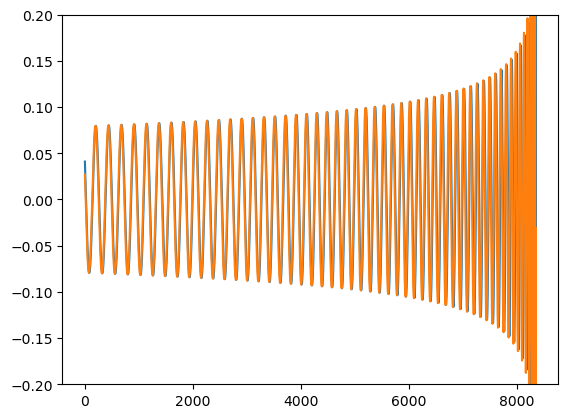

In [100]:
plt.plot(w_PN.t, -w_PN.data[:, h.index(2,2)].real)
plt.plot(t, h.data[:, h.index(2,2)].real)
plt.ylim(-2.e-1, 2.e-1)
# plt.xlim(500, 4000)
# plt.
plt.show()

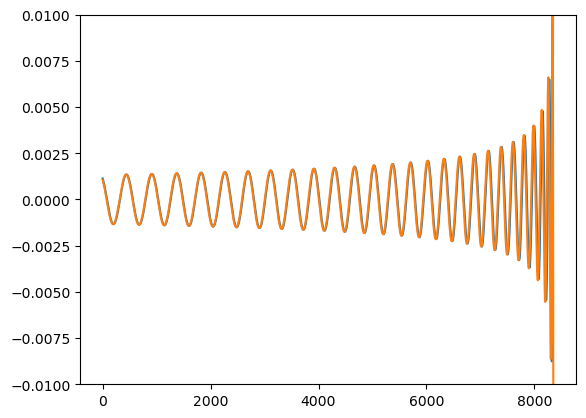

In [101]:
plt.plot(w_PN.t, -w_PN.data[:, h.index(2,1)].real)
plt.plot(t, h.data[:, h.index(2,1)].real)
plt.ylim(-1.e-2, 1.e-2)
# plt.xlim(500, 4000)
plt.show()

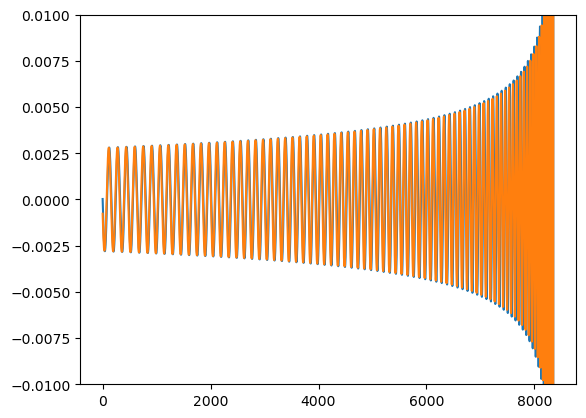

In [102]:
plt.plot(w_PN.t, -w_PN.data[:, h.index(3,3)].real)
plt.plot(t, h.data[:, h.index(3,3)].real)
plt.ylim(-1.e-2, 1.e-2)
# plt.xlim(500, 4000)
plt.show()